## Iris End to End Project

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 2 - Perfom basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [7]:
df.shape

(149, 5)

### Step 3 - Seperate X and Y

In [8]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [11]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

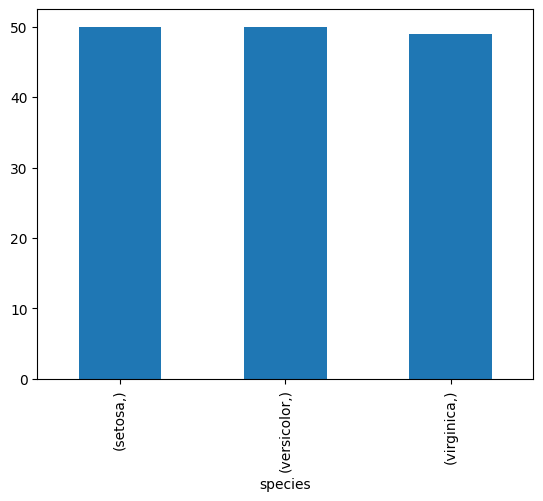

In [12]:
Y.value_counts().plot(kind="bar")

### Step 4 - Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=21)

In [14]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,3.1,4.9,1.5
49,5.0,3.3,1.4,0.2
65,6.7,3.1,4.4,1.4
117,7.7,3.8,6.7,2.2
55,5.7,2.8,4.5,1.3


In [15]:
ytrain.head()

,species
52,versicolor
49,setosa
65,versicolor
117,virginica
55,versicolor


In [16]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2


In [17]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [18]:
xtrain.shape

(99, 4)

In [19]:
xtest.shape

(50, 4)

### Step 5 - Model Building

In [20]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [22]:
model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression()
)

In [23]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Step 5 - Model evaluation

In [24]:
model.score(xtrain, ytrain)

0.9797979797979798

In [25]:
model.score(xtest, ytest)

0.94

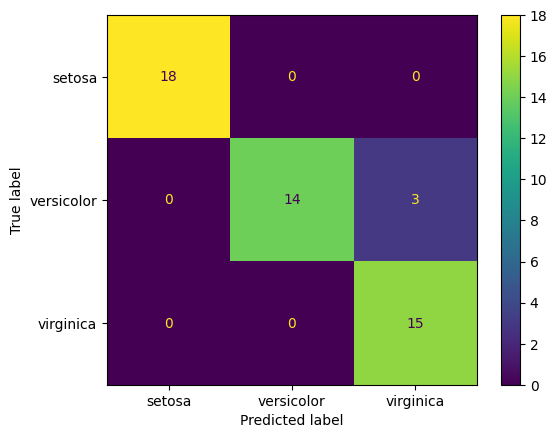

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [27]:
ypred_test = model.predict(xtest)

In [28]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [29]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [30]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")

scores

array([0.95213675, 1.        , 1.        , 0.8968254 , 1.        ])

In [32]:
scores.mean()

np.float64(0.9697924297924299)

### From above i can conclude that the model is good and can be used for out of sample prediction

### Save the model object in joblib

In [35]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [36]:
import joblib

joblib.dump(model, "iris_model.joblib")

['iris_model.joblib']

In [37]:
m = joblib.load("iris_model.joblib")
m

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Out of sample prediction

In [33]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [34]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
def predict_labels(model, sep_len, sep_wid, pet_len, pet_wid):
    xnew = [
        {
            "sepal_length": sep_len,
            "sepal_width": sep_wid,
            "petal_length": pet_len,
            "petal_width": pet_wid
        }
    ]
    df_xnew = pd.DataFrame(xnew)
    pred = model.predict(df_xnew)
    prob = model.predict_proba(df_xnew)

    res_prob = {}
    # Get probability as dictionary
    for c, p in zip(model.classes_, prob.flatten()):
        res_prob[c] = p.round(4)

    return pred[0], res_prob

In [55]:
pred1, prob1 = predict_labels(
    model,
    sep_len = 6.3,
    sep_wid = 2.5,
    pet_len = 4.9,
    pet_wid = 1.5
)

In [56]:
pred1

'versicolor'

In [57]:
prob1

{'setosa': np.float64(0.0013),
 'versicolor': np.float64(0.5728),
 'virginica': np.float64(0.4258)}

In [58]:
pred2, prob2 = predict_labels(
    model,
    sep_len= 6,
    sep_wid= 5,
    pet_len= 4,
    pet_wid= 3
)

In [59]:
pred2

'setosa'

In [60]:
prob2

{'setosa': np.float64(0.5921),
 'versicolor': np.float64(0.0239),
 'virginica': np.float64(0.384)}